# Evaluación del modelo

Tanto los modelos heurísticos, estadísticos o con base física son simplemente simplificaciones y aproximaciones a la realidad, la cual es mucho mas compleja y guarda elementos que desconocemos. Es por eso que debemos evaluar que tanto de aquella realidad estamos realmente representando. Para esto inicicialmente debemos establecer las siguientes definiciones:

* **Exactitud** (*accuracy*): se refiere al grado de qué tan cerca está la medida o valor mapeado o clase de un mapa a su valor verdadero o clase en el campo.
* **Error**: la diferencia entre el valor mapeado o la clase y el valor o clase verdadero.
* **Precisión**: referente a una medida como el grado al cual medidas repetidas bajo condiciones invariantes muestran el mismo resultado.
* **Incertidumbre** (*uncertainty*): grado con el cual las características actuales del terreno pueden ser presentadas espacialmente en un mapa.

Los términos objetividad y subjetividad son usados para señalar si los diferentes pasos tomados en la determinación de un grado de amenaza son verificables y reproducibles por otro investigador, o si ellos dependen del juicio personal del investigador.

:::{figure-md} precision
<img src="https://www.forecast.app/hs-fs/hubfs/accuracy-precision.jpg?width=454&name=accuracy-precision.jpg" alt="modelos" width="500px">

Exactitud y precisión de un modelo.
:::

Existen dos tipos de incertidumbre asociada a los modelos. La incertidumbre aleatoria que se refiere a la variabilidad que conocemos. Está implicita en muchas de las variables que incorporamos dentro de los modelos. Esta incertidumbre puede ser incorporada en nuestro análisis, y es precisamente la que tratamos de evaluar. Pero es importante tener en cuenta que existe la incertidumbre epistémica, la cual está asociada al desconocimiento o los limitantes que tenemos para describir dichos fenómenos físicos que estamos modelando. Debido precisamente a que se refire aquellos elementos que aun desconocemos, no puede entonces evaluarse o incorporarse directamente en los modelos.

## Desempeño y predicción
La aceptación de un modelo debe responder al menos a tres criterios:

* Su adecuación (conceptual y matemáticamente) en describir el comportamiento del sistema
* Su robustez a pequeños cambios de los parámetros de entrada (sensibilidad a los datos)
* Su exactitud en predecir los resultados.

De esta forma la evaluación de un modelo debe ser revisada contra la información usada para construir el modelo, la cual se refiere a la bondad del ajuste del modelo, y responde a la pregunta ¿qué tan bien el modelo se desempeña?. Pero también debe evaluarse el modelo contra el *futuro*, y que responde a la pregunta ¿qué tan bien el modelo predice?, y se refiere a la habilidad del modelo para predecir, en este caso, la ocurrencia de futuros deslizamientos.

## Validación cruzada
Como se menciona anteriormente la evaluación del modelo se debe realizar en dos campos, en términos del desempeño y en términos de la capacidad de predicción. Las mas compleja de estas evaluaciones se refiere a la capacidad de predicción, ya que sólo la ocurrencia de nuevos eventos a lo largo del tiempo puede determinar la capacidad de predicción de nuestro modelo. Pero precisamente la evaluación del desempeño, como de la predicción, se requieren al momento de construir el modelo. 

Para esto existen diferentes estrategias de partición de los datos que nos permiten obtener estas evaluaciones. Esta técnica se denomina validación cruzada y se refiere a un método de remuestreo que utiliza diferentes porciones de los datos para entrenar y evaluar un modelo en diferentes iteracciones. Esta técnica se puede utilizar tanto para la partición de datos espacialmente, es decir utilizar un área especifica para entrenar el modelo y evaluar su desempeño, y otra área de la zona de estudio, para evaluar la capacidad de predicción. O es tambien posible la partición temporal, es decir utilizar los datos en un rango de tiempo para entrenar el modelo y evaluar el desempeño del modelo, y utilizar otro rango de tiempo, generalmente posterior al inicial, para evaluar la capacidad de predicción. Para la evaluación de modelos de susceptibilidad por movimientos en masa se utiliza la primera de estas estrategias, partición espacial; sin embargo dicha partición no se realiza generalmente en áreas, ya que posiblemente existan diferencias entre ambas áreas en el mecanismo que gobierna el proceso, por lo tanto el error aumenta pero debido a que el modelo construido no representa el mecanismo del área donde se va a evaluar. De esta forma la partición de los datos se realiza aleatoriamente sobre toda el área de estudio.

:::{figure-md} cross validation
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs12665-021-09770-9/MediaObjects/12665_2021_9770_Fig4_HTML.png?as=webp" alt="cross validation" width="800px">

Procedimiento para validación cruzada.
:::

No existe un porcentaje o radio de separación unico utilizado, pero los porcentajes mas comunes utilizados están entre 80:20 y 70:30, lo cual significa 80% de los datos para entrenamiento o construcción del modelo, y el 20% restante para evaluar la capacidad de predicción.

## Matriz de confusión
Tanto para el desempeño como para la capacidad de predicción se utilizan las mismas métricas de evaluación, solo que se especifica si se refiere al desempeño del modelo o la capacidad de predicción. Generalmente, las métricas para el desempeño del modelo presentan mejores valores comparado con la capacidad de predicción. Y esto se debe a que el desempeño se evalúa con datos que el modelo conoce y a los cuales se ajustó, mientras que los datos que evaluan la capacidad de predicción no han sido conocidos por el modelo, y precisamente entre las dos métricas, la que generalmente se presenta al final de los procedimientos es la capacidad de predicción. La evaluación del desempeño del modelo corresponde a un paso interno que permite al modelador ajustar los parámetros del modelo.

Para la evaluación de los modelos de susceptibildiad por movimientos en masa se utilizan diferentes métricas:

* Distancia a la clasificación perfecta
* curva ROC (*Receiver Operating Characteristic*)
* Área bajo la curva ROC (AUROC)

Sin embargo todas estas parten de la **matriz de confusión** o tambien denominada matriz de contingencia o matriz de error. Esta matriz corresponde a una tabla cruzada de frecuencias para una variable categorica binaria, que compara los resultados de salida del modelo contra los valores de la variable dependiente reales o medidos, en este caso el inventario de movimientos en masa. En palabras sencillas, compara las predicciones del modelo con los datos.

:::{figure-md} matriz de confusion
<img src="https://rapidminer.com/wp-content/uploads/2022/06/Confusion-Matrix-1.jpeg" alt="matriz de confusion" width="800px">

Matriz de confusión.
:::

A partir de dicha matriz se obtienen los verdaderos positivos (*tp*), los cuales se refieren a las celdas que el modelo señala como inestables y que efectivamente en el inventario de movimientos en masa son eventos, los verdaderos negativos (*tn*), los cuales se refieren a las celdas que el modelo señala como estables y que en el inventario de movimientos en masa no hay registro de eventos. Tanto los *tp* como los *tn* corresponden a los aciertos del modelo. Por otro lado los errores son evaluados por los falsos positivos (*fp*), tambien conocidos como errores tipo I, los cuales se refieren a las celdas que el modelo señala como inestables y que en el inventario de movimientos en masa no registran eventos, y los falsos negativos (*fn*), tambien conocidos como errores tipo II, los cuales corresponden a las celdas que el modelo señala como estables y que en el inventario de movimientos en masa registran eventos.

Considerando que el mayor interes en los mapas de susceptibilidad corresponde a identificar aquellas áreas potencialmente inestables, generalmente son mas importantes las celdas inestables, es decir los verdaderos positivos y falsos positivos. Por lo tanto, se debe ser cuidadoso con las métricas utilizadas, ya que  esto puede llevar a errores en este tipo de modelos que son por naturaleza desbalanceados. Un modelo muy malo puede tener valores de *tp* muy altos simplemente asignándole valores de inestable a todas las celdas de la cuenca. Esto arroja un modelo con un desempeño y capacidad de predicción del 100%, sin embargo si se revisan los falsos positivos, es decir los errores por sobre estimación, estos también van a ser cercanos al 100%. Entonces un buen modelo es aquel que identifica las areas inestables, altos valores de *tp*, y al mismo tiempo valores bajos de *fp*. Pero la realidad señala que el aumento de los *tp* lleva consigo el aumento de los *fp*, por lo tanto un buen modelo debe encontrar el mejor equilibrio entre ambas métricas.

A partir de esta matriz se construye una serie de métricas que permite evaluar el modelo:

### *False positive rate*
Tambien conocido como **error tipo I**, y explica la capacidad que tiene el modelo de equivocarse entre las celdas estables.

### *True negative rate*
Tambien conocido como **specificity** o **recall** y explica la capacidad que tiene el modelo de acertar entre las celdas inestables.

### *False negative rate*
También denominado *error tipo II*, y explica la capacidad que tiene el modelo de equivocarse entre las celdas inestables.

### *True positive rate*
También conocido como *precision*, y explica la capacidad que tiene el modelo de acertar entre las celdas estables

### *Accuracy*
Se refiere a que también el modelo clasifica, tanto celdas estables como inestables, con respecto al total de celdas, es decir el porcentaje de celdas que acierta el modelo. Esta métrica también es afectada por el desbalanceo original que representa el problema. Es decir, que puede arrojar valores muy altos, aunque el modelo sea mediocre, ya que los verdaderos negativo *tn* tienden a ser muy altos, es facil predecir los *no*, y esto incrementa el valor del *accuracy*.

### *F-measure*
Esta métrica trata de compensar el desbalanceo y se estima como.

$F-measure=\frac{2*Recall*Precision}{Recall+Precision}$

## Curva ROC
La matriz de contingencia puede llevarse a un espacio bidimensional que compara los *True positive rate* o *Sensitivity* en el eje *y* contra el *False positive rate* en el eje *x*, que se estima como $1-Specificity$. Esto nos permite comparar el desempeño de diferentes modelos. El modelo con el mejor desempeño teorico posible corresponde a la ezquina superior derecha del gráfico, ya que representa el punto con el 100% de aciertos contra el 0% de equivocaciones. La distancia euclidiana a dicho punto correpsonde a la **Distancia a la clasificación perfecta (r)**, por lo tanto los modelos con una menor distancia presentan un mejor desempeño.

$r=\sqrt{fpr^2 + (1-tpr)^2}$

:::{figure-md} r
<img src="https://i.pinimg.com/564x/0b/82/e2/0b82e29fa53d0de12645b9dfabf2b100.jpg" alt="r" width="800px">

Distancia a la clasificación perfecta.
:::

Hasta este punto hemos evaluado métricas que requieren que la variable dependiente $y$ sea binaria, es decir 0 ó 1. Esto implica que para modelos que arrojan un rango de valores para cada celda, donde un extremo de estos valores representa celdas inestables y el otro extremo representa celdas estables, es necesario entonces establecer un umbral que separe entre estos dos rangos, estables e inestables. Para modelos con base fisica basados en el factor de seguridad, este procedimiento es mucho mas sencillo, por que el valor del factor de seguridad de 1 representa un umbral establecido por el propio modelo. Para modelos con regresion logística, bivariados, o incluso modelos con base físia pero basados en indice de confiabilidad, por ejemplo, dicho umbral no es claro. Esto es importante por que entonces los resutlados de la evaluación del modelo están en función del umbral seleccionado. ¿Cómo entonces poder evaluar un modelo con una métrica independiente del umbral?.

Lo que responde esto es la curva ROC, y específicamente el área bajo la curva ROC. Esta curva se construye graficando múltiples puntos, tantos como se desee, asignando diferentes umbrales. es decir que la curva ROC representa todos los puntos del modelo para todo el rango de valores del indice de susceptibilidad obtenidos.

:::{figure-md} AUROC
<img src="https://www.researchgate.net/publication/351506473/figure/fig2/AS:1022506102169601@1620795860506/ROC-curves-and-area-under-curve-AUC.png" alt="auroc" width="600px">

Matriz de confusión.
:::

El valor del AUROC varía entre 0 y 1, donde 1 es un modelo perfecto. Generalmente en el espacio de la curva ROC se gráfica una línea diagonal que representa un AUROC del 0.5. Esta se utiliza como referente de un modelo mediocre que tiene un número igual de aciertos a desaciertos, lo que se busca es obtener modelos con mayores aciertos que desaciertos, por lo tanto implica curvas convexas donde el AUROC > 0.5.

:::{figure-md} AUROC1
<img src="https://i.pinimg.com/564x/ad/6a/5a/ad6a5a68d8dcb06b7a08b135150efc94.jpg" alt="auroc1" width="700px">

Modelo completamente erroneo.
:::

:::{figure-md} AUROC2
<img src="https://i.pinimg.com/564x/0d/4b/60/0d4b60a775acbfa8cd645df32ef3b9f7.jpg" alt="auroc2" width="700px">

Modelo perfecto.
:::

:::{figure-md} AUROC3
<img src="https://i.pinimg.com/564x/80/40/ee/8040ee1f9c25c45b3a5ae773a48e1660.jpg" alt="auroc3" width="700px">

Modelo mediocre.
:::

:::{figure-md} AUROC
<img src="https://i.pinimg.com/564x/c6/48/af/c648af60209d8a97bdbddd5dc8c99d60.jpg" alt="auroc" width="700px">

Modelo adecuado.
:::


## *Python*

In [11]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A continuación se importa el inventario de movimientos en masa, así como los mapas de las variables predictoras a utilizar:

(910801,)

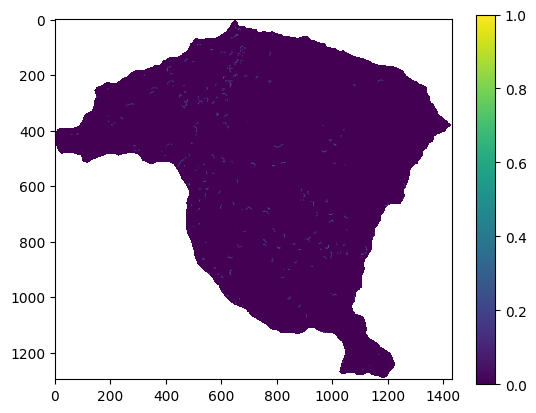

In [14]:
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/raw/master/data/miel/Inventario_MenM.tif')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/raw/master/data/miel/Pendiente.tif')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

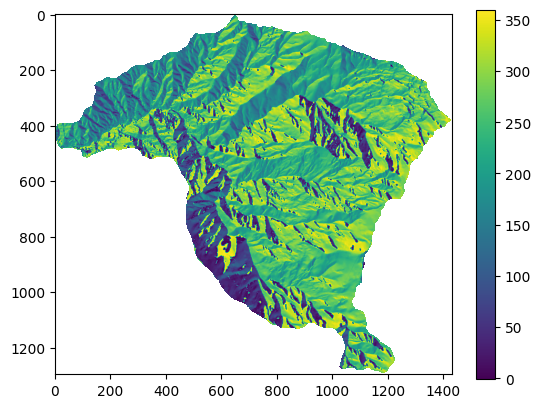

In [15]:
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/raw/master/data/miel/Aspecto.tif')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()

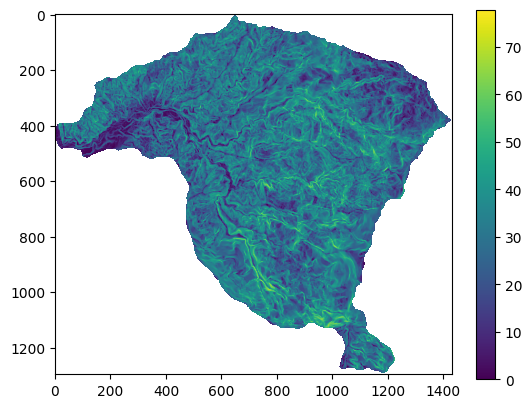

In [16]:
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/raw/master/data/miel/Pendiente.tif')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente);
plt.colorbar();
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]

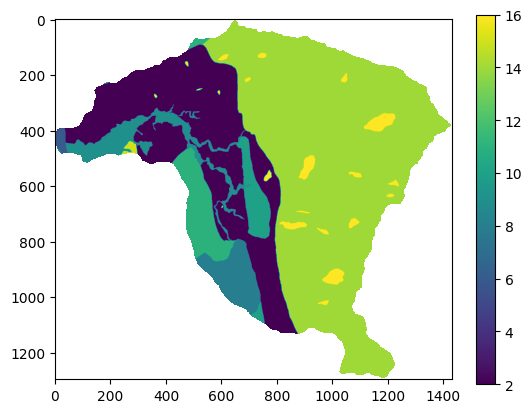

In [17]:
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/raw/master/data/miel/Geologia_Superficial.tif')
geologia=raster.read(1)
geologia=np.where(geologia<0,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar();

In [19]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM,'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,pendiente,aspecto,geologia
0,10.862183,208.523560,14.0
1,12.265345,207.437332,14.0
2,12.469252,202.684647,14.0
3,13.148026,211.619766,14.0
4,14.091524,220.028976,14.0


In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

### Validación cruzada

In [21]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (728640, 3)
Tamaño de labels de entrenamiento: (728640,)
Tamaño de variables de validación: (182161, 3)
Tamaño de labels de validación: (182161,)


### Desempeño del modelo

In [22]:
result=model.fit(x_train,y_train)

In [23]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encima es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[727313,      0],
       [   395,    932]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    727313
         1.0       1.00      0.70      0.83      1327

    accuracy                           1.00    728640
   macro avg       1.00      0.85      0.91    728640
weighted avg       1.00      1.00      1.00    728640



Text(0.5, 1.0, 'ROC Curve for training')

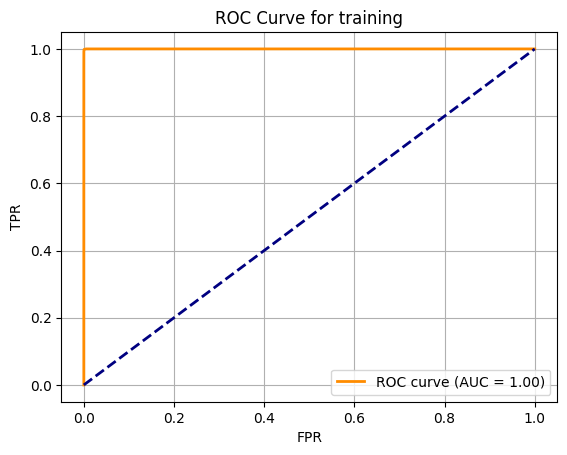

In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(y_train,y_train_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC Curve for training')

### Capacidad de predicción

In [29]:
y_val_pred=result.predict(x_test) 
y_val_probs=result.predict_proba(x_test)[:,1]

In [30]:
confusion_matrix(y_test, y_val_pred)

array([[181864,      4],
       [   293,      0]], dtype=int64)

In [31]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181868
         1.0       0.00      0.00      0.00       293

    accuracy                           1.00    182161
   macro avg       0.50      0.50      0.50    182161
weighted avg       1.00      1.00      1.00    182161



Text(0.5, 1.0, 'ROC Curve for prediction')

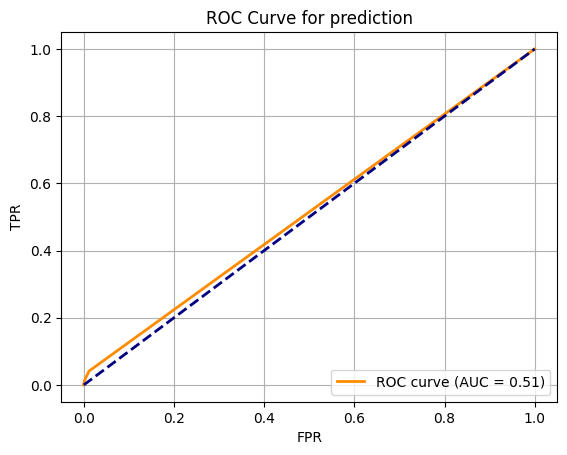

In [32]:
fpr, tpr, thresholds=roc_curve(y_test,y_val_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC Curve for prediction')

Para obtener los valores del index de susceptibilidad utilizados para cada punto de la curva se obtiene el thresholds, para esto vamos a construir un dataframe calculando ademas el 1-fpr y el tf.

In [38]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(thresholds, index = i)})
roc.head(len(tpr))

,fpr,tpr,1-fpr,tf,threshold
0,0.000000,0.000000,1.000000,-1.000000,inf
1,0.000005,0.000000,0.999995,-0.999995,0.7
2,0.000022,0.000000,0.999978,-0.999978,0.6
3,0.000066,0.000000,0.999934,-0.999934,0.5
4,0.000225,0.000000,0.999775,-0.999775,0.4
5,0.000852,0.010239,0.999148,-0.988909,0.3
6,0.002821,0.017065,0.997179,-0.980114,0.2
7,0.011409,0.040956,0.988591,-0.947635,0.1
8,1.000000,1.000000,0.000000,1.000000,0.0


Para estimar el punto mas cercano a la clasificación perfecta (ezquina superior izquierda de ROC), el cual corresponde al umbral que presenta la mejor matrz de confusiónse se puede realizar lo siguienteÑ
* Utilizar la función argsort
* Buscar en el dataframe el umbral que corresponde al valor de tf=0
* Graficar TPR y 1-FPR. El intercepto de dichas gráficas corresponde al umbral buscado.


In [37]:
#funcion argsort
best=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print(best)

        fpr       tpr     1-fpr        tf  threshold
7  0.011409  0.040956  0.988591 -0.947635        0.1


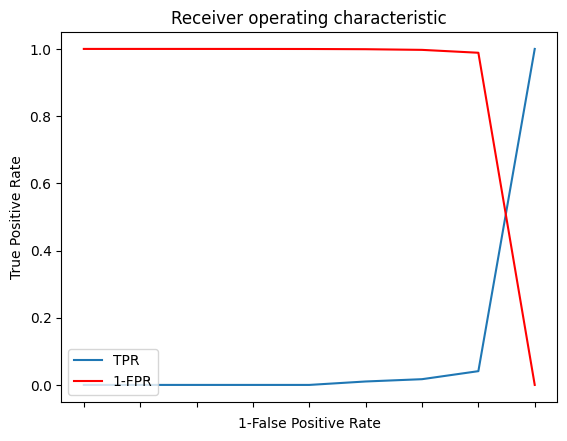

In [40]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'],label='TPR')
plt.plot(roc['1-fpr'], color = 'red',label='1-FPR')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower left")

ax.set_xticklabels([]);

Otra figura muy utilizada, especialmente cuando se tienen bases de datos desbalanceadas, como en estos casos, se utiliza la gráfica precicsión-recall.

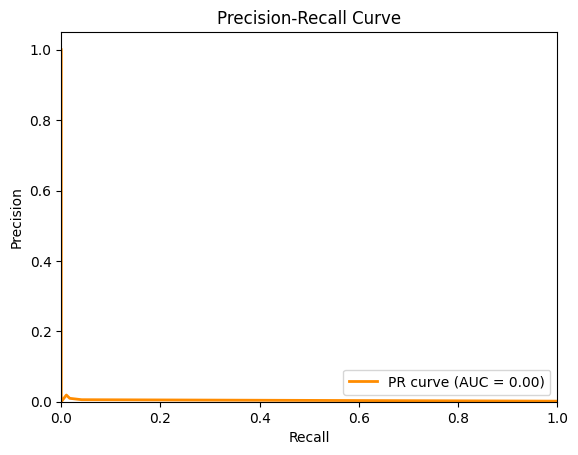

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate the Precision-Recall curve
precision, recall, th2 = precision_recall_curve(y_test, y_val_probs)
pr_auc = average_precision_score(y_test, y_val_probs)

# Plot the Precision-Recall curve
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

### Calcular mapa de susceptibilidad final

Finalmente, cuando se obtiene el mejor modelo y los valores de métrica suficientes, entonces se obtiene el mapa de susceptibilidad con todos los datos, adicionalmente en este caso, para mantener la configuracion espacial del mapa se construye el dataframe donde los datos NaN se modifican a cero(0).

In [27]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)

f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}
x_map=pd.DataFrame(f)
x_map

,pendiente,aspecto,geologia
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1854705,0.0,0.0,0.0
1854706,0.0,0.0,0.0
1854707,0.0,0.0,0.0
1854708,0.0,0.0,0.0


Con este dataframe y el modelo entrenado se calcula el valor para cada celda de la cuenca.

In [28]:
y_pred=model.predict_proba(x_map)[:,1]

Para eliminar los puntos por fuera de la cuenca, que se modificaron por 0, se importa otro mapa como mascara y se convierten los valores de estas celdas en NaN.

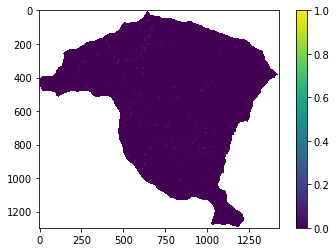

In [30]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/edieraristizabal/Libro_cartoGeotecnia/blob/master/data/Pendiente.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

## Referencias
```{bibliography}
:style: plain
:filter: docname in docnames
```